In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [2]:
test_data = pd.read_csv('test (1).csv')
train_data = pd.read_csv('train (1).csv')

In [3]:
train_data.drop(['Alley', 'FireplaceQu', 'PoolQC'], inplace=True, axis=1)

In [4]:
test_data.drop(['Alley', 'FireplaceQu', 'PoolQC'], inplace=True, axis=1)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,144,0,NaN,NaN,0,1,2010,WD,Normal


In [7]:
categ_feat = [i for i in train_data.columns if train_data[i].dtype == 'O']
num_feat = [i for i in train_data.columns if train_data[i].dtype == 'int64' or train_data[i].dtype == 'float64']

In [8]:
train_data['Fence'] = train_data['Fence'].apply(lambda x: 0 if x is np.nan else 1)
test_data['Fence'] = train_data['Fence'].apply(lambda x: 0 if x is np.nan else 1)

In [9]:
train_data['MiscFeature'] = train_data['MiscFeature'].apply(lambda x: 0 if x is np.nan else 1)
test_data['MiscFeature'] = train_data['MiscFeature'].apply(lambda x: 0 if x is np.nan else 1)

In [10]:
for col in categ_feat:
    train_data[col].fillna(train_data[col].mode().get(0), inplace=True)

In [11]:
for col in num_feat:
    train_data[col] = train_data[col].fillna(train_data[col].mean())

In [12]:
for col in categ_feat:
    test_data[col].fillna(test_data[col].mode().get(0), inplace=True)

In [13]:
for col in num_feat[:-1]:
    test_data[col] = test_data[col].fillna(test_data[col].mean())

In [14]:
train_data_dummy = pd.get_dummies(train_data[categ_feat])

In [15]:
test_data_dummy = pd.get_dummies(test_data[categ_feat])

In [16]:
test_data_dummy.shape

(1459, 220)

In [17]:
train_data_dummy.shape

(1460, 236)

In [18]:
train_data_dummy_no_intersection = train_data_dummy.drop(list(set(train_data_dummy.columns) - set(test_data_dummy.columns)), axis=1)

In [19]:
train_data_dummy_no_intersection.shape

(1460, 220)

In [20]:
X = pd.concat([train_data.drop(categ_feat, axis=1), train_data_dummy_no_intersection], axis=1).drop(['SalePrice', 'Id'], axis=1)

In [21]:
y = train_data['SalePrice']

In [22]:
X_test = pd.concat([test_data.drop(categ_feat, axis=1), test_data_dummy], axis=1).drop('Id', axis=1)

In [23]:
X_test.shape

(1459, 256)

In [24]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


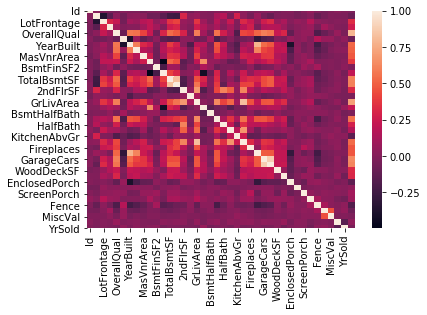

In [25]:
sns.heatmap(train_data.corr());

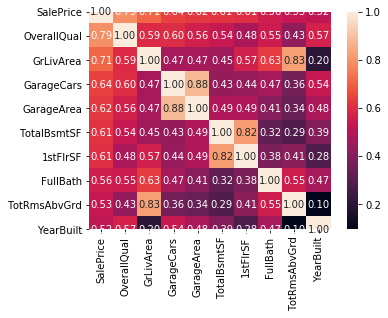

In [26]:
k = 10
cols = train_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
train_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


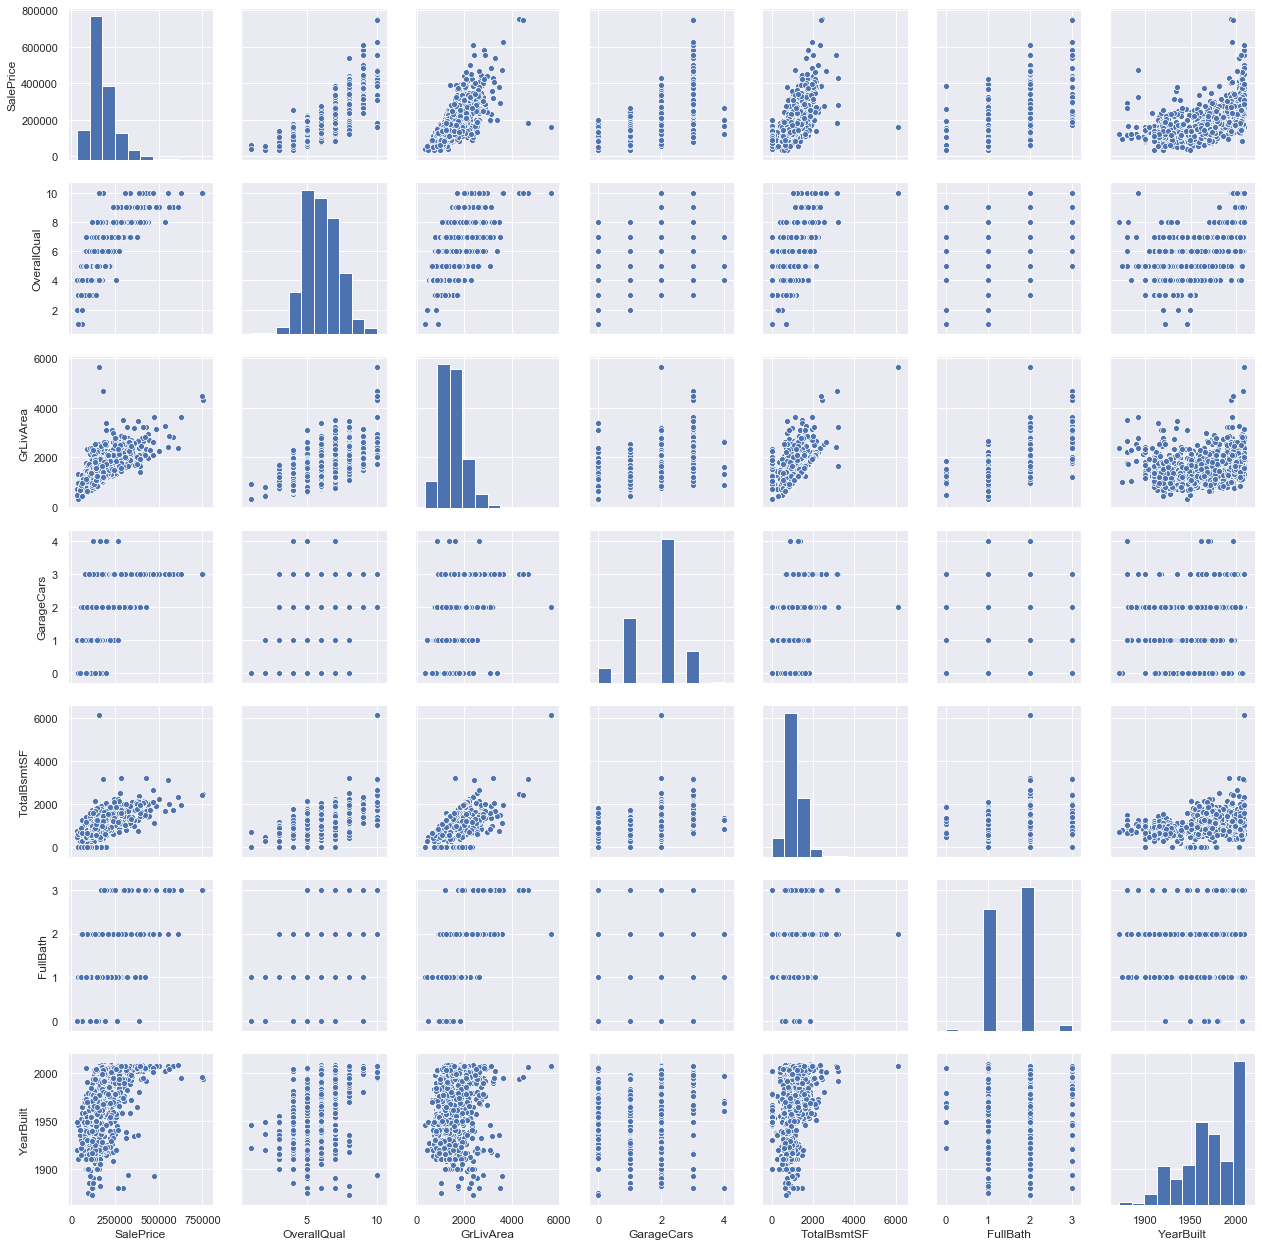

In [28]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

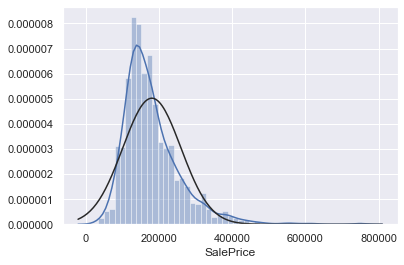

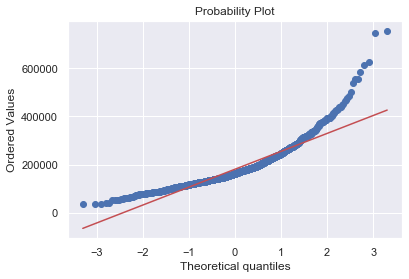

In [29]:
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

In [30]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

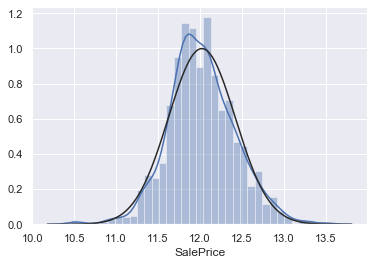

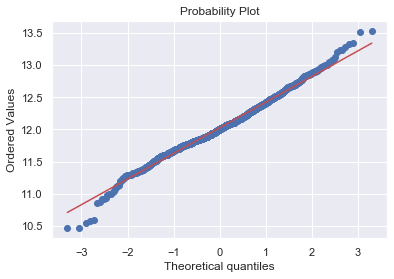

In [31]:
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

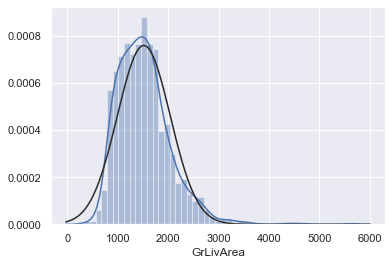

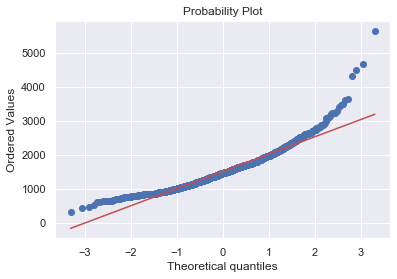

In [32]:
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

In [33]:
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])
test_data['GrLivArea'] = np.log(test_data['GrLivArea'])

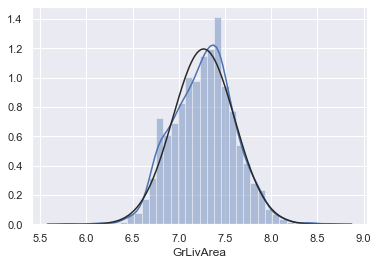

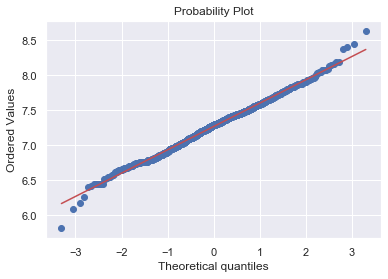

In [34]:
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

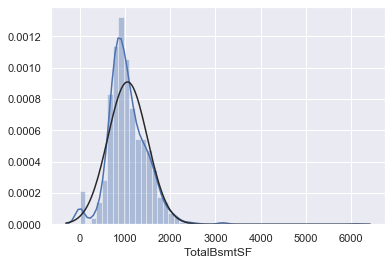

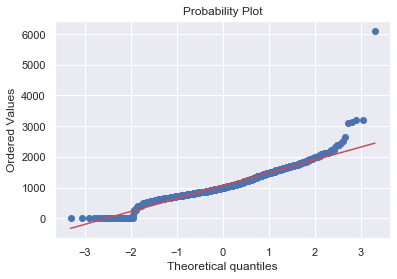

In [35]:
sns.distplot(train_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

In [36]:
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF'] > 0,'HasBsmt'] = 1

test_data['HasBsmt'] = pd.Series(len(test_data['TotalBsmtSF']), index=test_data.index)
test_data['HasBsmt'] = 0 
test_data.loc[test_data['TotalBsmtSF'] > 0,'HasBsmt'] = 1

In [37]:
train_data.loc[train_data['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

test_data.loc[test_data['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(test_data['TotalBsmtSF'])

c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


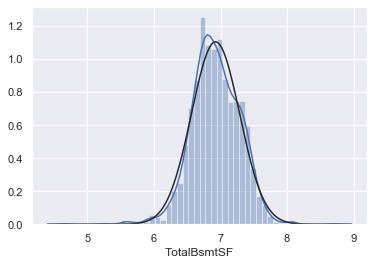

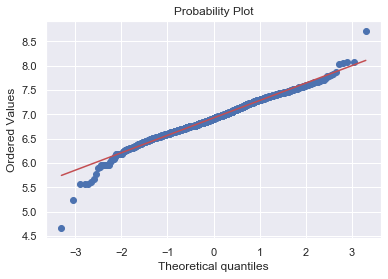

In [38]:
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [39]:
X_lin = pd.concat([train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']],
                   train_data['YearBuilt'].apply(lambda x: x**2).rename('YearBuilt_sqr')], axis=1)

In [40]:
X_lin_test = pd.concat([test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']],
                        test_data['YearBuilt'].apply(lambda x: x**2).rename('YearBuilt_sqr')], axis=1)

In [41]:
X_lin.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearBuilt_sqr
0,7,7.444249,2,6.752270,2,2003,4012009
1,6,7.140453,2,7.140453,2,1976,3904576
2,7,7.487734,2,6.824374,2,2001,4004001
3,7,7.448334,3,6.628041,1,1915,3667225
4,8,7.695303,3,7.043160,2,2000,4000000


In [42]:
X_lin_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearBuilt_sqr
0,5,6.797940,1.0,6.782192,1,1961,3845521
1,6,7.192182,1.0,7.192182,1,1958,3833764
2,5,7.395722,2.0,6.833032,2,1997,3988009
3,6,7.380256,2.0,6.830874,2,1998,3992004
4,8,7.154615,2.0,7.154615,2,1992,3968064


In [43]:
scaler = StandardScaler().fit(X_lin)
X_lin_scaled = pd.DataFrame(scaler.transform(X_lin), columns=X_lin.columns)
X_lin_scaled

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearBuilt_sqr
0,0.651479,0.529260,0.311725,0.002389,0.789741,1.050994,1.056717
1,-0.071836,-0.381846,0.311725,0.341327,0.789741,0.156734,0.149962
2,0.651479,0.659675,0.311725,0.065346,0.789741,0.984752,0.989128
3,0.651479,0.541511,1.650307,-0.106080,-1.026041,-1.863632,-1.853325
4,1.374795,1.282191,1.650307,0.256376,0.789741,0.951632,0.955359
...,...,...,...,...,...,...,...
1455,-0.071836,0.416680,0.311725,0.096116,0.789741,0.918511,0.921607
1456,-0.071836,1.106592,0.311725,0.516289,0.789741,0.222975,0.216707
1457,0.651479,1.469942,-1.026858,0.261698,0.789741,-1.002492,-1.007146
1458,-0.795151,-0.854471,-1.026858,0.203729,-1.026041,-0.704406,-0.711579


In [44]:
X_lin_test_scaled = pd.DataFrame(scaler.transform(X_lin_test), columns=X_lin.columns)
X_lin_test_scaled

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearBuilt_sqr
0,-0.795151,-1.409067,-1.026858,0.028515,-1.026041,-0.340077,-0.348473
1,-0.071836,-0.226707,-1.026858,0.386494,-1.026041,-0.439440,-0.447705
2,-0.795151,0.383723,0.311725,0.072905,0.789741,0.852269,0.854153
3,-0.071836,0.337340,0.311725,0.071021,0.789741,0.885390,0.887871
4,1.374795,-0.339372,0.311725,0.353693,0.789741,0.686666,0.685813
...,...,...,...,...,...,...,...
1454,-1.518467,-0.815773,-2.365440,-0.390219,-1.026041,-0.041991,-0.049868
1455,-1.518467,-0.815773,-1.026858,-0.390219,-1.026041,-0.041991,-0.049868
1456,-0.795151,-0.473539,0.311725,0.314632,-1.026041,-0.373198,-0.381567
1457,-0.795151,-1.171074,-2.365440,0.057720,-1.026041,0.686666,0.685813


In [45]:
lin_reg = LinearRegression().fit(X_lin_scaled, train_data['SalePrice'])
cv_score = -1*cross_val_score(lin_reg, X_lin_scaled, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


In [46]:
np.sqrt(cv_score.mean())

0.17156634104546895

In [47]:
np.exp(lin_reg.predict(X_lin_test_scaled))

array([112043.45659565, 150320.85709653, 169403.58654797, ...,
       142671.01537362, 112187.92802312, 252021.59665873])

In [48]:
pd.DataFrame(np.exp(lin_reg.predict(X_lin_test_scaled)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_lin_reg_top_corr_feat.csv')

In [49]:
lin_reg.predict(X_lin_test_scaled)

array([11.62664208, 11.92052734, 12.04003923, ..., 11.86829667,
       11.62793067, 12.43727006])

In [50]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [51]:
ridge = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error').fit(X_lin_scaled, train_data['SalePrice'])

In [52]:
ridge.alpha_

0.01

In [53]:
ridge.coef_

array([ 0.14634273,  0.15219554,  0.06720769,  0.04089589, -0.00697787,
        2.05266073, -1.97914484])

In [54]:
ridgecv_score = -1*cross_val_score(ridge, X_lin_scaled, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)
np.sqrt(ridgecv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


0.17156570187726816

In [55]:
pd.DataFrame(np.exp(ridge.predict(X_lin_test_scaled)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_ridgecv_top_corr_feat.csv')

In [56]:
len(num_feat)

38

In [57]:
pca = PCA(0.9, random_state=45)

In [58]:
X_lin_scaled_pca = pca.fit_transform(X_lin_scaled)
X_lin_scaled_pca_test = pca.transform(X_lin_test_scaled)

In [63]:
ridge = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error').fit(X_lin_scaled_pca, train_data['SalePrice'])

In [67]:
ridgecv_score = -1*cross_val_score(ridge, X_lin_scaled_pca, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)
np.sqrt(ridgecv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


0.18278334595765372

In [69]:
pd.DataFrame(np.exp(ridge.predict(X_lin_scaled_pca_test)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_ridgecv_top_corr_feat_pca.csv')

In [74]:
X_lin_dummy = pd.concat([train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']],
                   train_data['YearBuilt'].apply(lambda x: x**2).rename('YearBuilt_sqr'), train_data_dummy_no_intersection], axis=1)

X_lin_dummy_test = pd.concat([test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']],
                        test_data['YearBuilt'].apply(lambda x: x**2).rename('YearBuilt_sqr'), test_data_dummy], axis=1)

In [79]:
X_lin_dummy_scaled = scaler.fit_transform(X_lin_dummy)
X_lin_dummy_test_scaled = scaler.transform(X_lin_dummy_test)

In [82]:
X_lin_dummy_scaled_pca = pca.fit_transform(X_lin_dummy_scaled)
X_lin_dummy_test_scaled_pca = pca.transform(X_lin_dummy_test_scaled)

In [84]:
ridge = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error').fit(X_lin_dummy_scaled_pca, train_data['SalePrice'])

In [87]:
ridgecv_score = -1*cross_val_score(ridge, X_lin_dummy_scaled_pca, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)
np.sqrt(ridgecv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished


0.15383616186767454

In [88]:
pd.DataFrame(np.exp(ridge.predict(X_lin_dummy_test_scaled_pca)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_ridgecv_top_corr_feat_pca_dummy.csv')

In [92]:
lasso = LassoCV(alphas=ridge_alphas, cv=5).fit(X_lin_dummy_scaled_pca, train_data['SalePrice'])

In [93]:
lasso.alpha_

0.01

In [95]:
ridgecv_score = -1*cross_val_score(lasso, X_lin_dummy_scaled_pca, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)
np.sqrt(ridgecv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


0.1595586914912997

In [96]:
pd.DataFrame(np.exp(ridge.predict(X_lin_dummy_test_scaled_pca)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_lassocv_top_corr_feat_pca_dummy.csv')

In [101]:
X_lasso = pd.concat([train_data.drop(categ_feat, axis=1), train_data_dummy_no_intersection], axis=1).drop(['SalePrice', 'Id'], axis=1)
X_lasso_test = pd.concat([test_data.drop(categ_feat, axis=1), test_data_dummy], axis=1).drop('Id', axis=1)

In [102]:
X_lasso_scaled = scaler.fit_transform(X_lasso)
X_lasso_test_scaled = scaler.transform(X_lasso_test)

In [103]:
lasso = LassoCV(alphas=ridge_alphas, cv=5).fit(X_lasso_scaled, train_data['SalePrice'])

In [104]:
lasso.alpha_

0.01

In [111]:
coefs = pd.DataFrame(abs(lasso.coef_), index=X_lasso.columns, columns=['coef'])

In [113]:
coefs[coefs['coef'] != 0].sort_values(by='coef', ascending=False)

,coef
GrLivArea,1.308697e-01
OverallQual,9.186400e-02
YearBuilt,4.188403e-02
GarageCars,4.069864e-02
OverallCond,3.052167e-02
MSZoning_RM,2.536406e-02
MSZoning_C (all),2.304426e-02
YearRemodAdd,1.847226e-02
Fireplaces,1.507411e-02
BsmtFinType1_Unf,1.498422e-02


In [114]:
ridgecv_score = -1*cross_val_score(lasso, X_lasso_scaled, train_data['SalePrice'], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=True)
np.sqrt(ridgecv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


0.13585911680959845

In [115]:
pd.DataFrame(np.exp(lasso.predict(X_lasso_test_scaled)), index=test_data['Id'], columns=['SalePrice']).to_csv('submit_lassocv.csv')